In [4]:
%load_ext autoreload
%autoreload 2
%run ~/FKMC/notebooks/notebook_preamble.py
%matplotlib inline
%run ./matplotlib_fig_settings.py

np.seterr(under = 'ignore')

#data_location = Path('/data/users/tch14/pickled_data')
#figure_location = Path('/home/tch14/workspace/fake_home/Dropbox/Apps/Overleaf/Short Paper/figs')

data_location = Path('~/HPC_data/pickled_data').expanduser()
#figure_location = Path('~/DropBox/Apps/Overleaf/Short Paper/figs/').expanduser()
figure_location = Path('~/git/FK_short_paper/figs').expanduser()

width = columnwidth
height =  columnwidth / 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Imported pathlib::Path, os, munch::Munch, pickle, logging, itertools::count, matplotlib::colors
Names are pyplot = plt, matplotlib = mpl, numpy = np


In [12]:
#%%time
from FKMC.import_funcs import interpolate_IPR, incremental_load, extract, mean_over_MCMC, IPRandDOS, extractStates
from FKMC.general import smooth

functions = [
    mean_over_MCMC('Mf_moments', N_error_bins = 10),
    IPRandDOS(),
    extractStates(),
]
oU5 = incremental_load(folder = '~/HPC_data/IPR_DOR_U5_J5_above_below_Tc', functions = functions, 
                       force_reload = False,
                       force_to_use_pickled = True,
                      loglevel = logging.DEBUG)

oU5.hints.state

('Ns', 'Ts', 'MCMC_step', 'N')

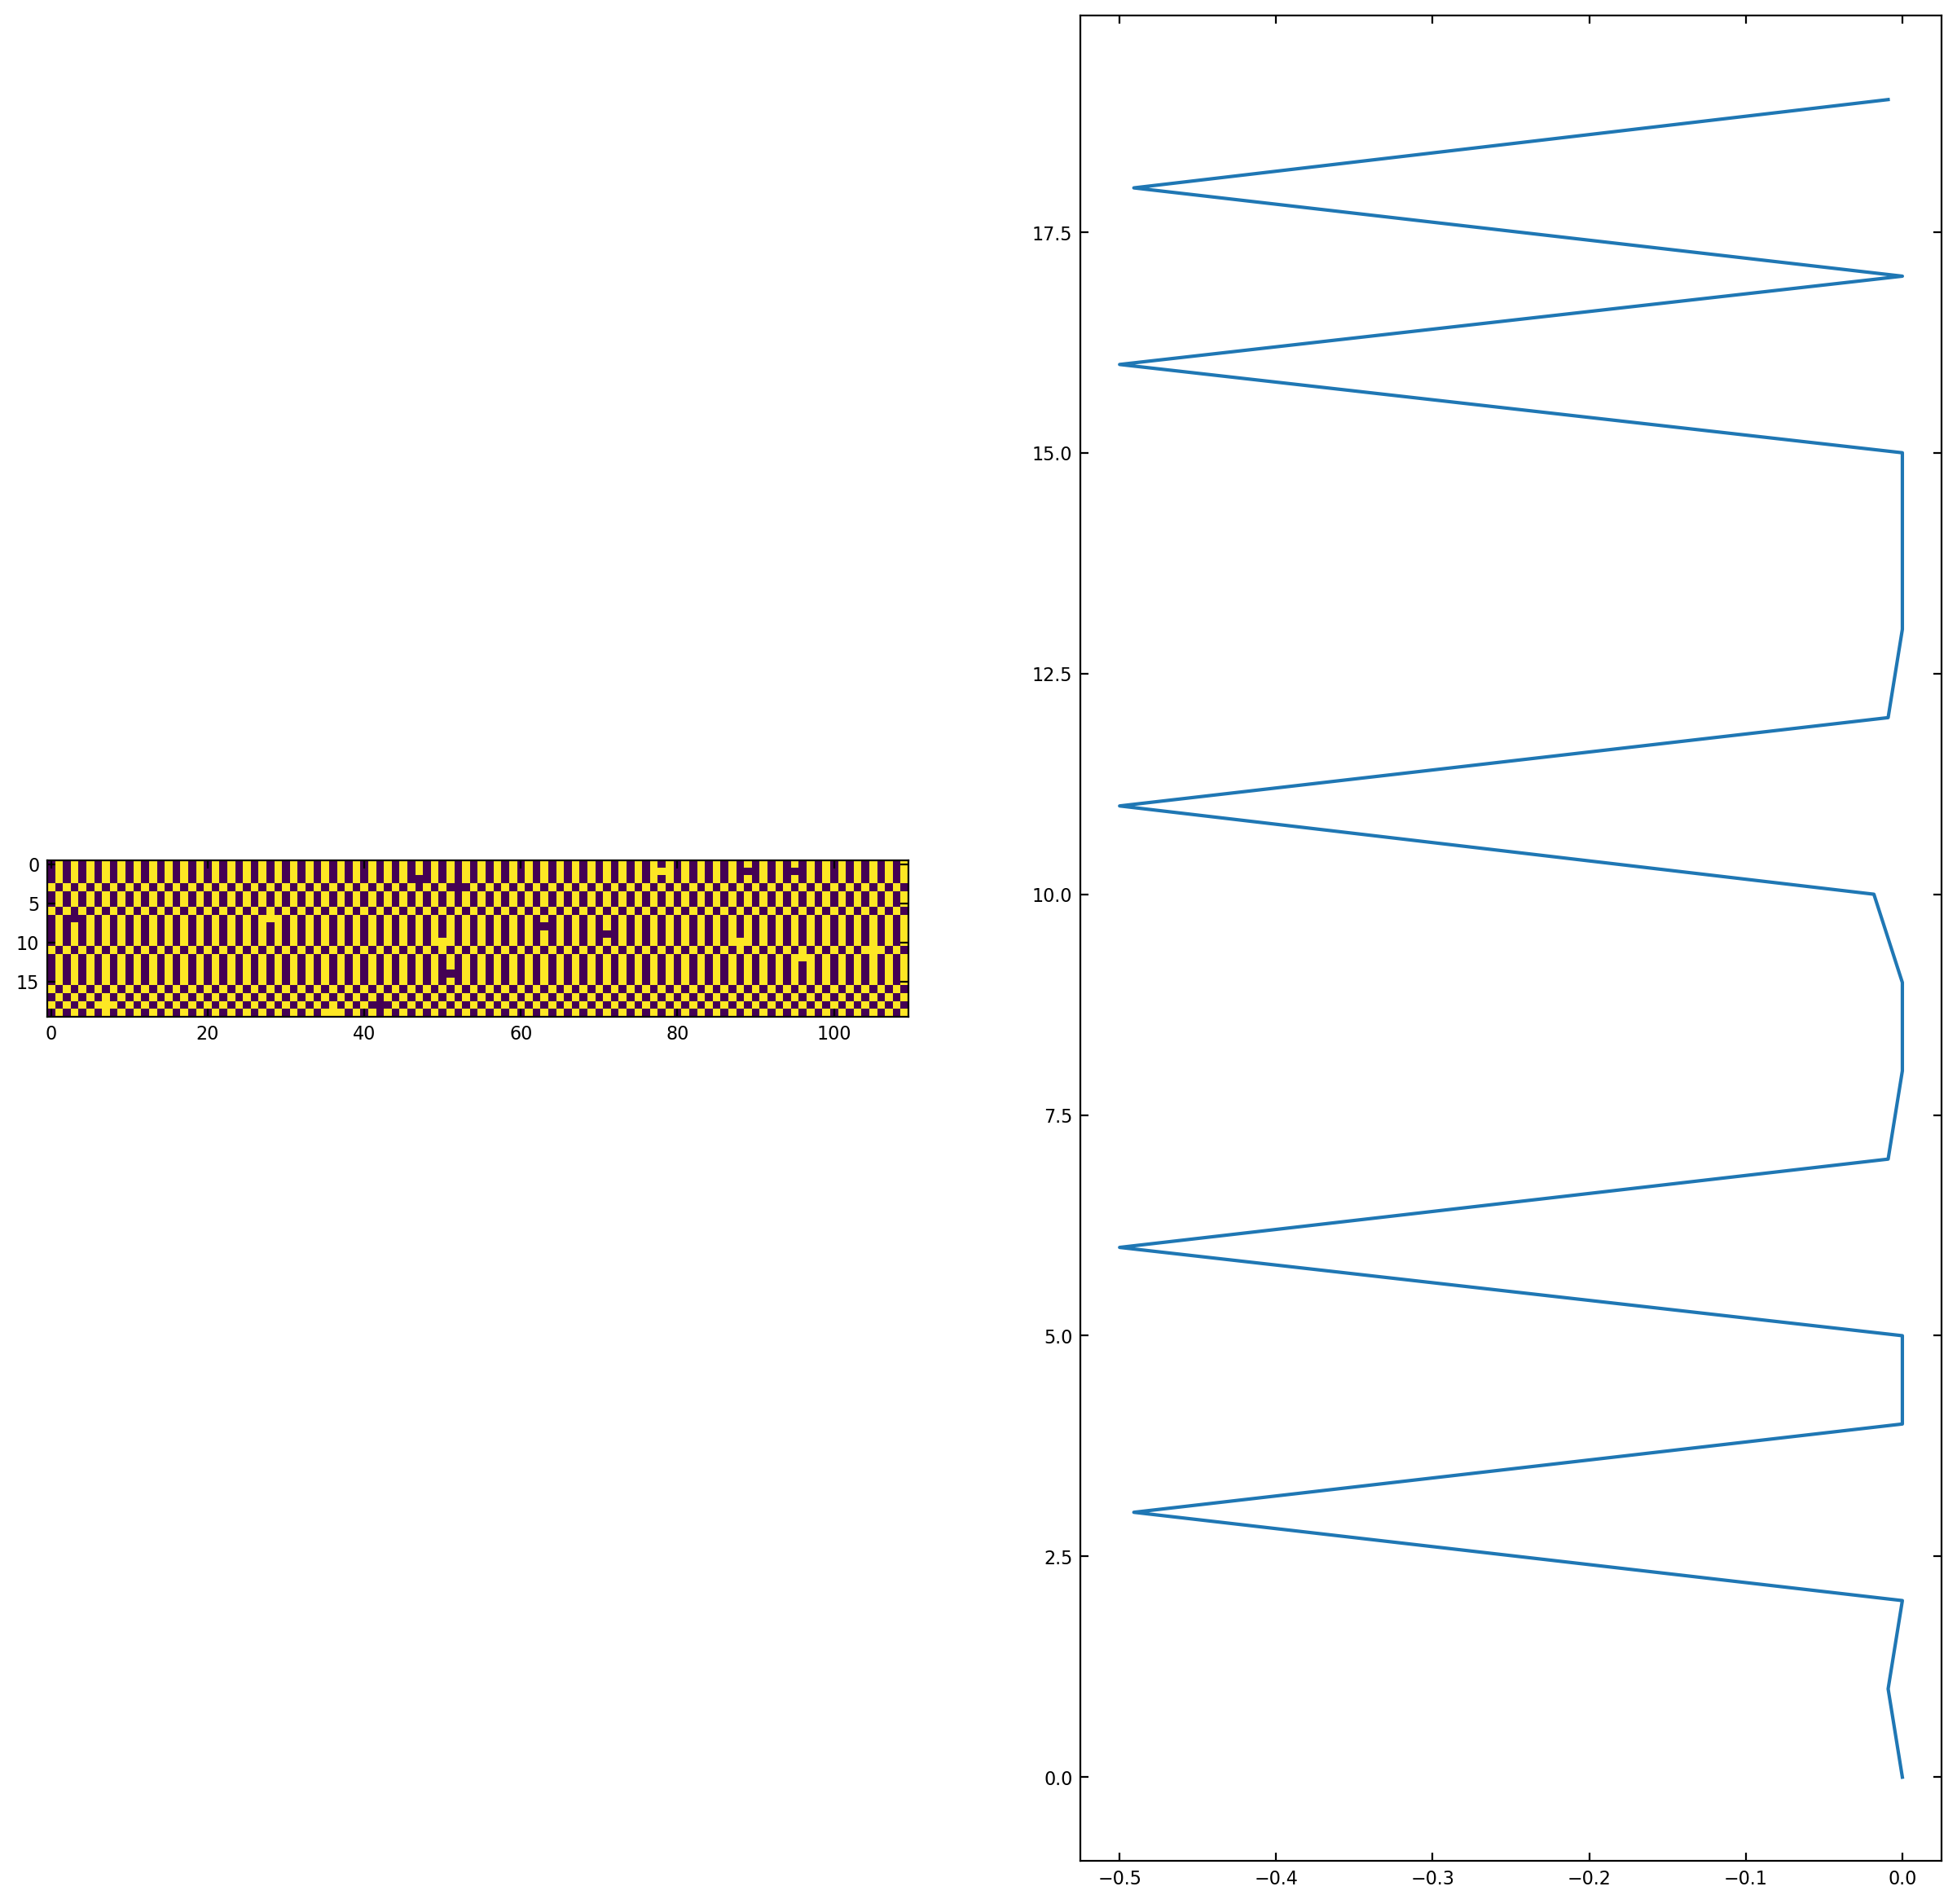

In [49]:
f, (ax,ax2) = plt.subplots(ncols = 2, figsize = (15,15))
N_i = 3
N = oU5.Ns[N_i]
A = (np.arange(N) % 2 - 1)
s = oU5.state[N_i][0, ::50]

m = (np.mean(A[None, :] * s, axis = -1))

ax.imshow(s)
ax2.plot(m, np.arange(s.shape[0]))

In [ ]:
.ipynb_checkpoints/